In [2]:
import os 

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



def monitor_norms(filename, file_dir):
    filepath = os.path.join(file_dir, filename)
    df = pd.read_csv(filepath)
    
    df[['epoch_idx', 'split']] = df['epoch_info'].str.extract(r'Epoch(\d+)_(\w+)')
    df['epoch_idx'] = pd.to_numeric(df['epoch_idx'])
    
    splits = df['split'].unique()
    n_splits = len(splits)
    
    fig, axes = plt.subplots(n_splits, 1, figsize=(12, 6 * n_splits))
    if n_splits == 1:
        axes = [axes]
        
    for i, split in enumerate(splits):
        split_df = df[df["split"] == split]
        #split_df = split_df.head(40)
        
        axes[i].plot(split_df['epoch_idx'], split_df['avg_nuclear'], label='Nuclear Norm', marker='o')
        axes[i].plot(split_df['epoch_idx'], split_df['avg_frobenius'], label='Frobenius Norm', marker='x')
        
        axes[i].set_title(f"Norm Monitor for {split}")
        axes[i].set_xlabel('Epoch')
        axes[i].set_ylabel('Norm Value')
        axes[i].legend()
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()

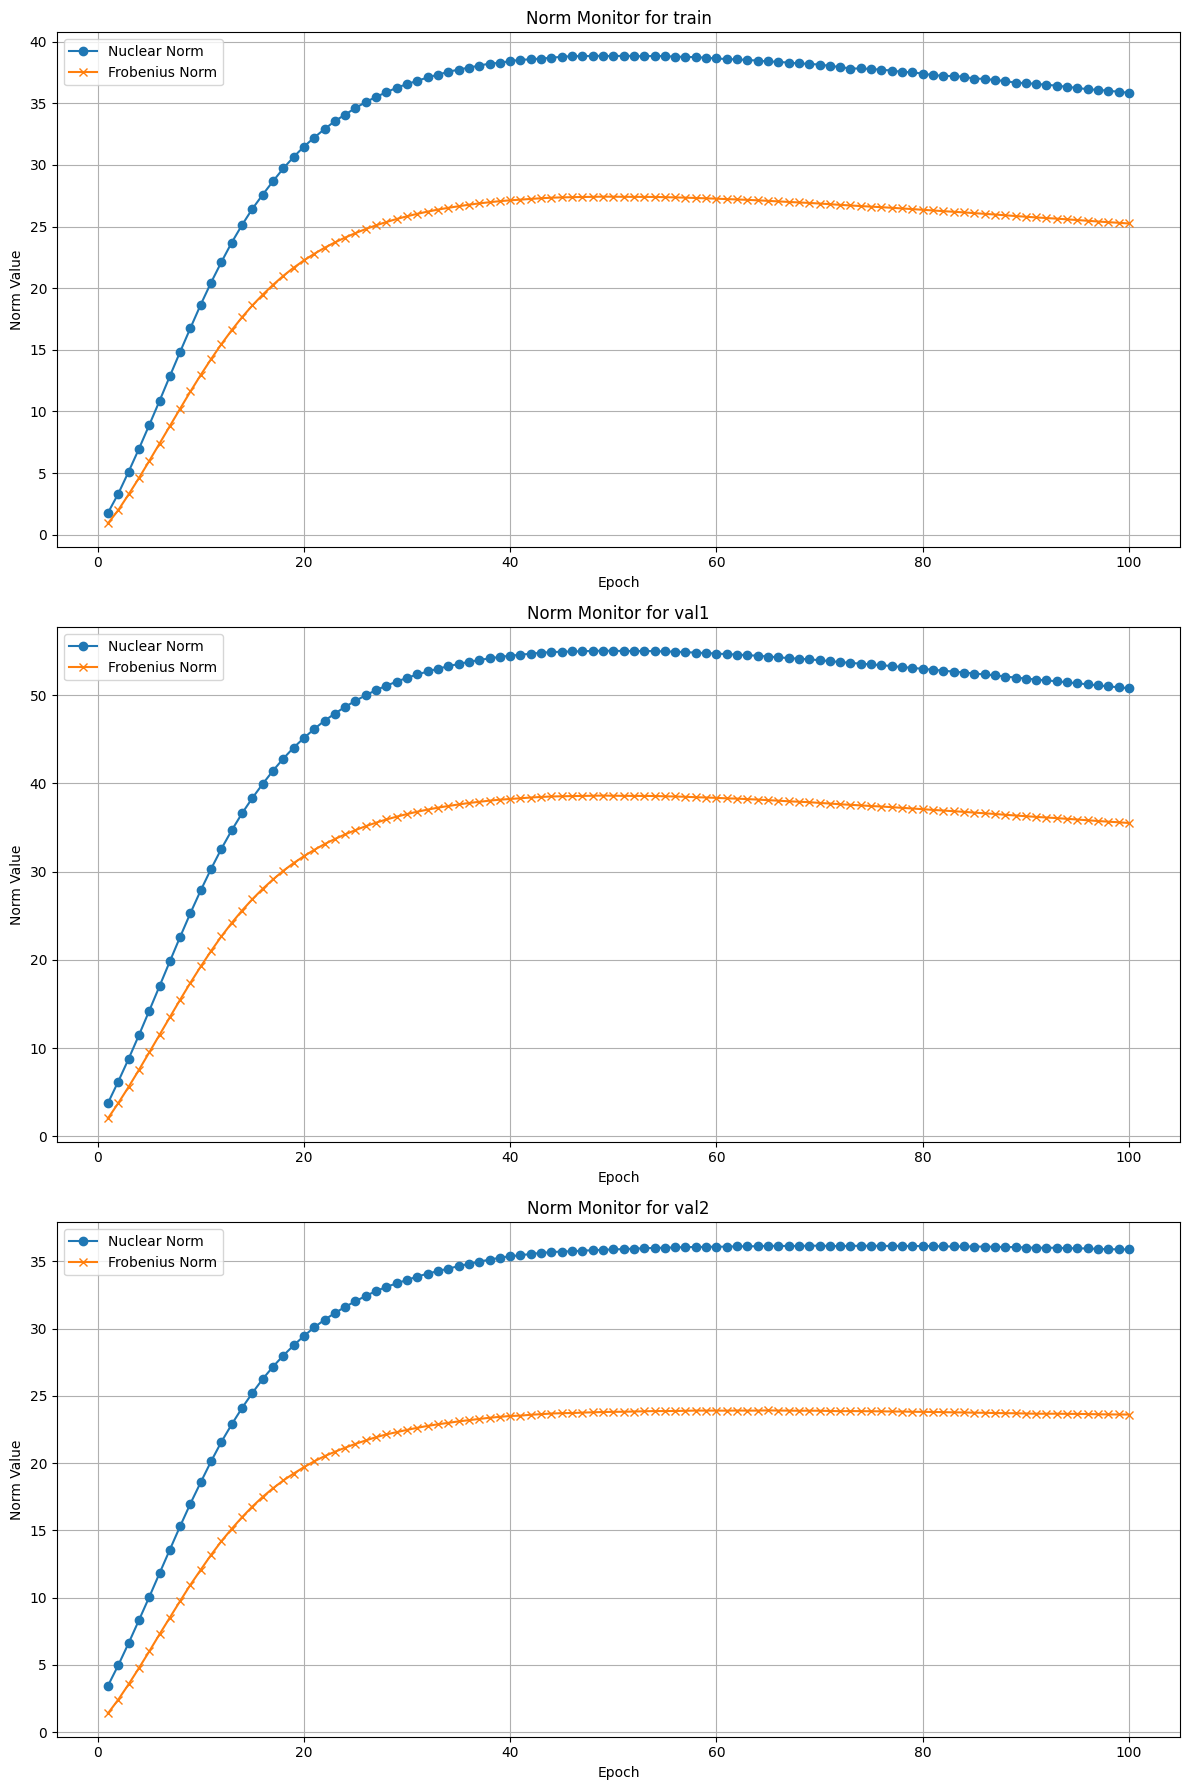

In [5]:
file_dir = "/home/ym2380/elastic_net/official/logs/exp11/shallow_net/config1024/reg"
filename = "m_400.csv"

monitor_norms(filename=filename, file_dir=file_dir)